# CONCRETE DATASET ---> LINEAR REGRESSION

In [15]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [16]:
cnc=pd.read_csv('concrete.csv')

In [17]:
cnc

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [18]:
cnc.keys()

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

In [19]:
cnc.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

In [20]:
cnc.shape

(1030, 9)

In [21]:
cnc.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

<Axes: >

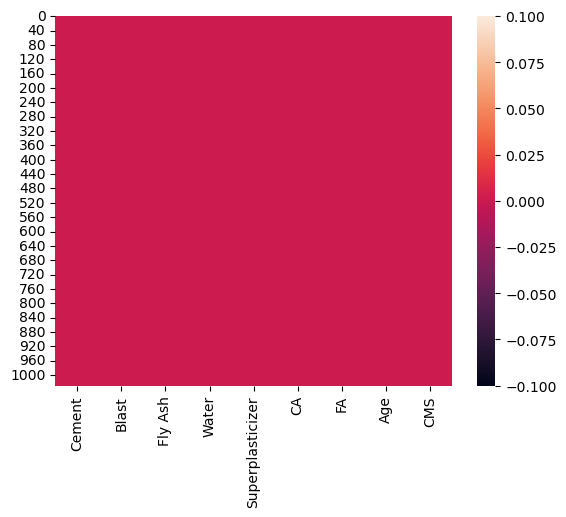

In [22]:
sns.heatmap(cnc.isnull())

In [23]:
cnc.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [24]:
cnc.skew()

Cement              0.509481
Blast               0.800717
Fly Ash             0.537354
Water               0.074628
Superplasticizer    0.907203
CA                 -0.040220
FA                 -0.253010
Age                 3.269177
CMS                 0.416977
dtype: float64

<Axes: >

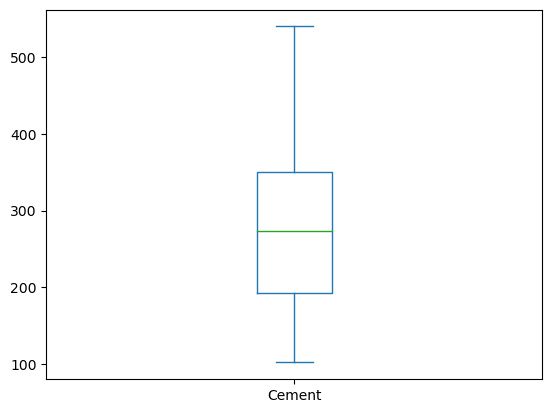

In [25]:
cnc['Cement'].plot.box()

<Axes: >

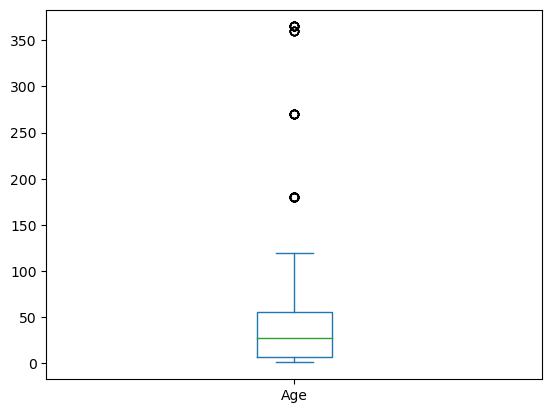

In [26]:
cnc['Age'].plot.box()

<Axes: >

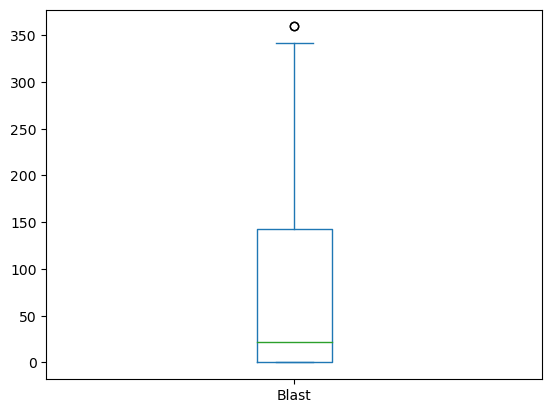

In [28]:
cnc['Blast'].plot.box()

<Axes: >

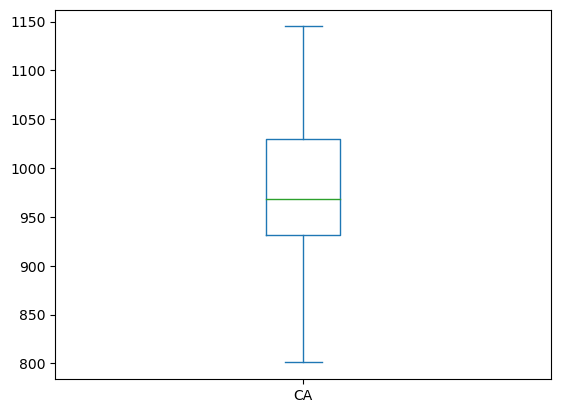

In [29]:
cnc['CA'].plot.box()

<Axes: >

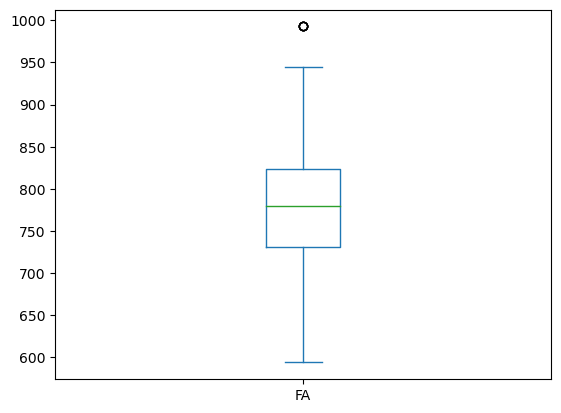

In [30]:
cnc['FA'].plot.box()

Cement                 Axes(0.125,0.653529;0.227941x0.226471)
Blast               Axes(0.398529,0.653529;0.227941x0.226471)
Fly Ash             Axes(0.672059,0.653529;0.227941x0.226471)
Water                  Axes(0.125,0.381765;0.227941x0.226471)
Superplasticizer    Axes(0.398529,0.381765;0.227941x0.226471)
CA                  Axes(0.672059,0.381765;0.227941x0.226471)
FA                         Axes(0.125,0.11;0.227941x0.226471)
Age                     Axes(0.398529,0.11;0.227941x0.226471)
CMS                     Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

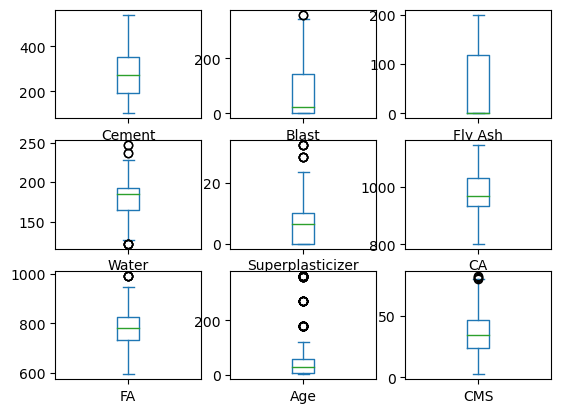

In [33]:
cnc.plot(kind='box',subplots=True,layout=(3,3))

Removing Outliers

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(cnc))

In [35]:
z

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,2.477915,0.856888,0.847144,0.916764,0.620448,0.863154,1.217670,0.279733,2.645408
1,2.477915,0.856888,0.847144,0.916764,0.620448,1.056164,1.217670,0.279733,1.561421
2,0.491425,0.795526,0.847144,2.175461,1.039143,0.526517,2.240917,3.553066,0.266627
3,0.491425,0.795526,0.847144,2.175461,1.039143,0.526517,2.240917,5.057677,0.313340
4,0.790459,0.678408,0.847144,0.488793,1.039143,0.070527,0.647884,4.978487,0.507979
...,...,...,...,...,...,...,...,...,...
1025,0.045645,0.488235,0.564545,0.092171,0.451410,1.323005,0.065893,0.279733,0.506781
1026,0.392819,0.856888,0.960068,0.676200,0.702626,1.994680,0.496893,0.279733,0.277762
1027,1.270088,0.759579,0.850635,0.521589,0.017528,1.036064,0.080107,0.279733,0.725729
1028,1.168610,1.308065,0.847144,0.279579,0.853356,0.214641,0.191166,0.279733,0.182539


In [36]:
#threshold for zscore value --> above 3 are considered  outliers
threshold=3
print(np.where(z>3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3], dtype=int64))


<Axes: ylabel='Frequency'>

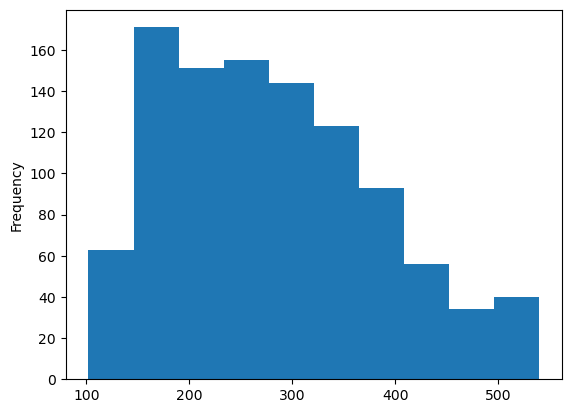

In [38]:
cnc['Cement'].plot.hist()

<Axes: ylabel='Frequency'>

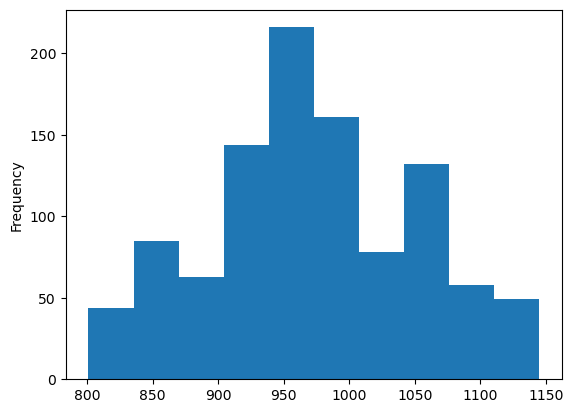

In [39]:
cnc['CA'].plot.hist()

<Axes: ylabel='Frequency'>

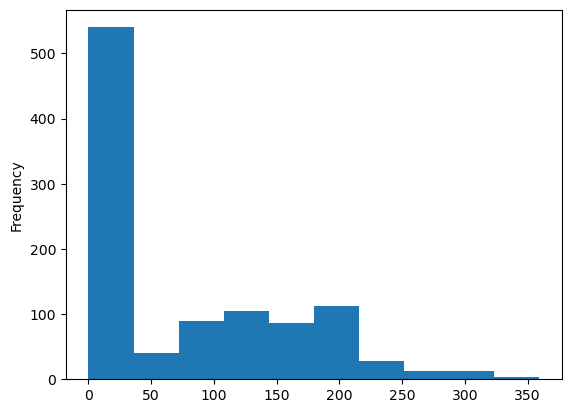

In [40]:
cnc['Blast'].plot.hist()

<Axes: ylabel='Frequency'>

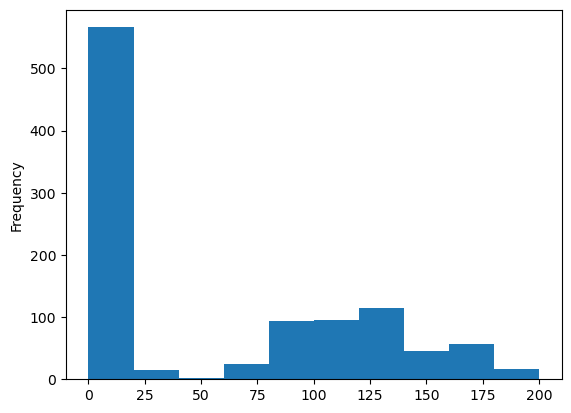

In [41]:
cnc['Fly Ash'].plot.hist()

<Axes: ylabel='Frequency'>

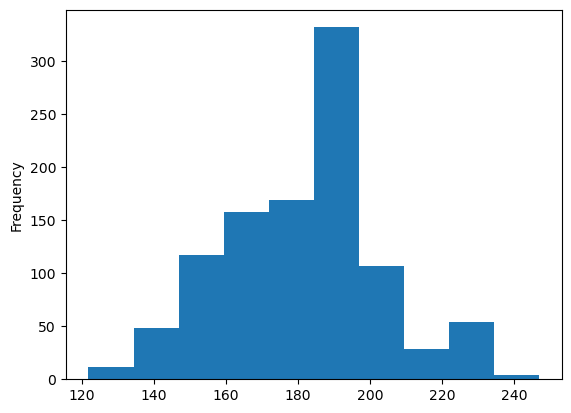

In [42]:
cnc['Water'].plot.hist()

In [43]:
from scipy.stats import boxcox
cnc['Cement']=boxcox(cnc['Cement'],0)

<Axes: ylabel='Frequency'>

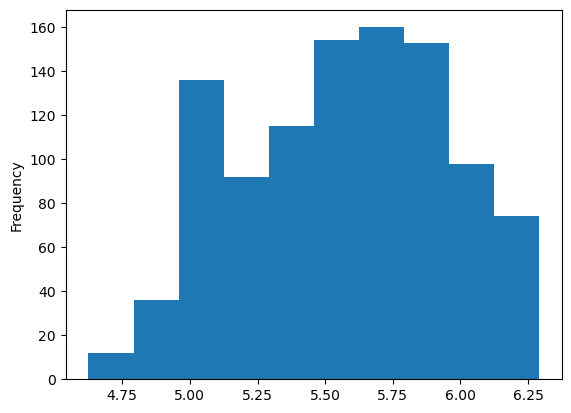

In [44]:
cnc['Cement'].plot.hist()

In [45]:
from scipy.stats import boxcox
cnc['Cement']=boxcox(cnc['CA'],0)

<Axes: ylabel='Frequency'>

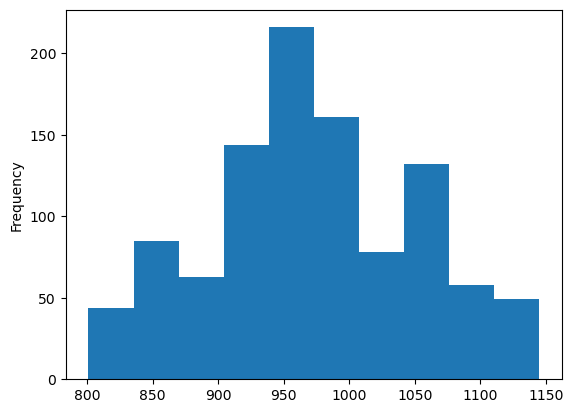

In [46]:
cnc['CA'].plot.hist()

In [47]:
from scipy.stats import boxcox
cnc['Blast']=boxcox(cnc['CA'],0)

<Axes: ylabel='Frequency'>

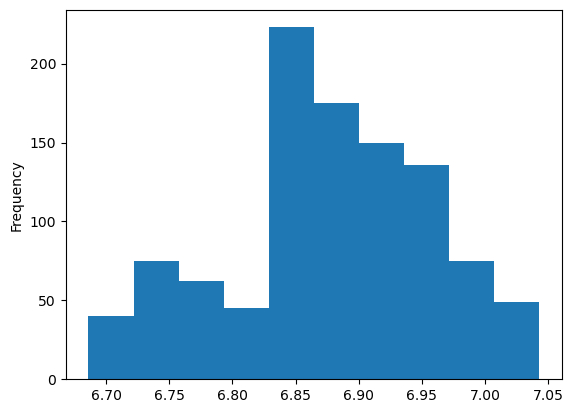

In [48]:
cnc['Blast'].plot.hist()

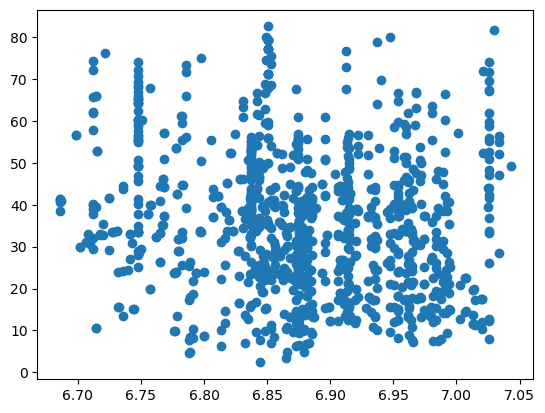

In [49]:
plt.scatter(cnc['Cement'],cnc['CMS'])

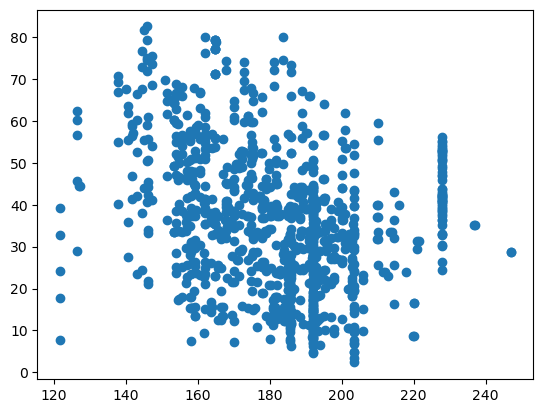

In [51]:
plt.scatter(cnc['Water'],cnc['CMS'])

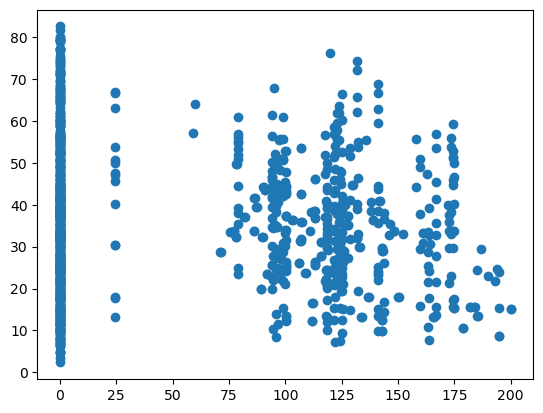

In [53]:
plt.scatter(cnc['Fly Ash'],cnc['CMS'])

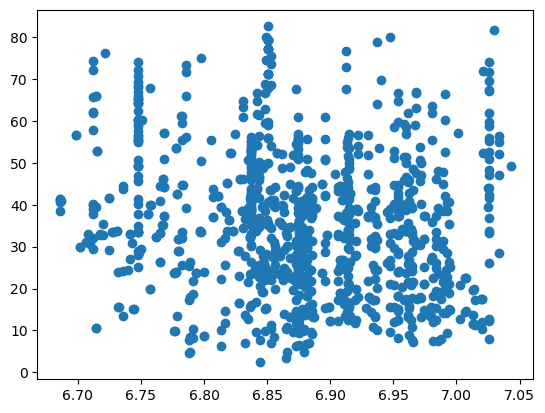

In [54]:
x=cnc['Cement']
y=cnc['CMS']
plt.scatter(x,y)
plt.show()

C:\Users\admn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


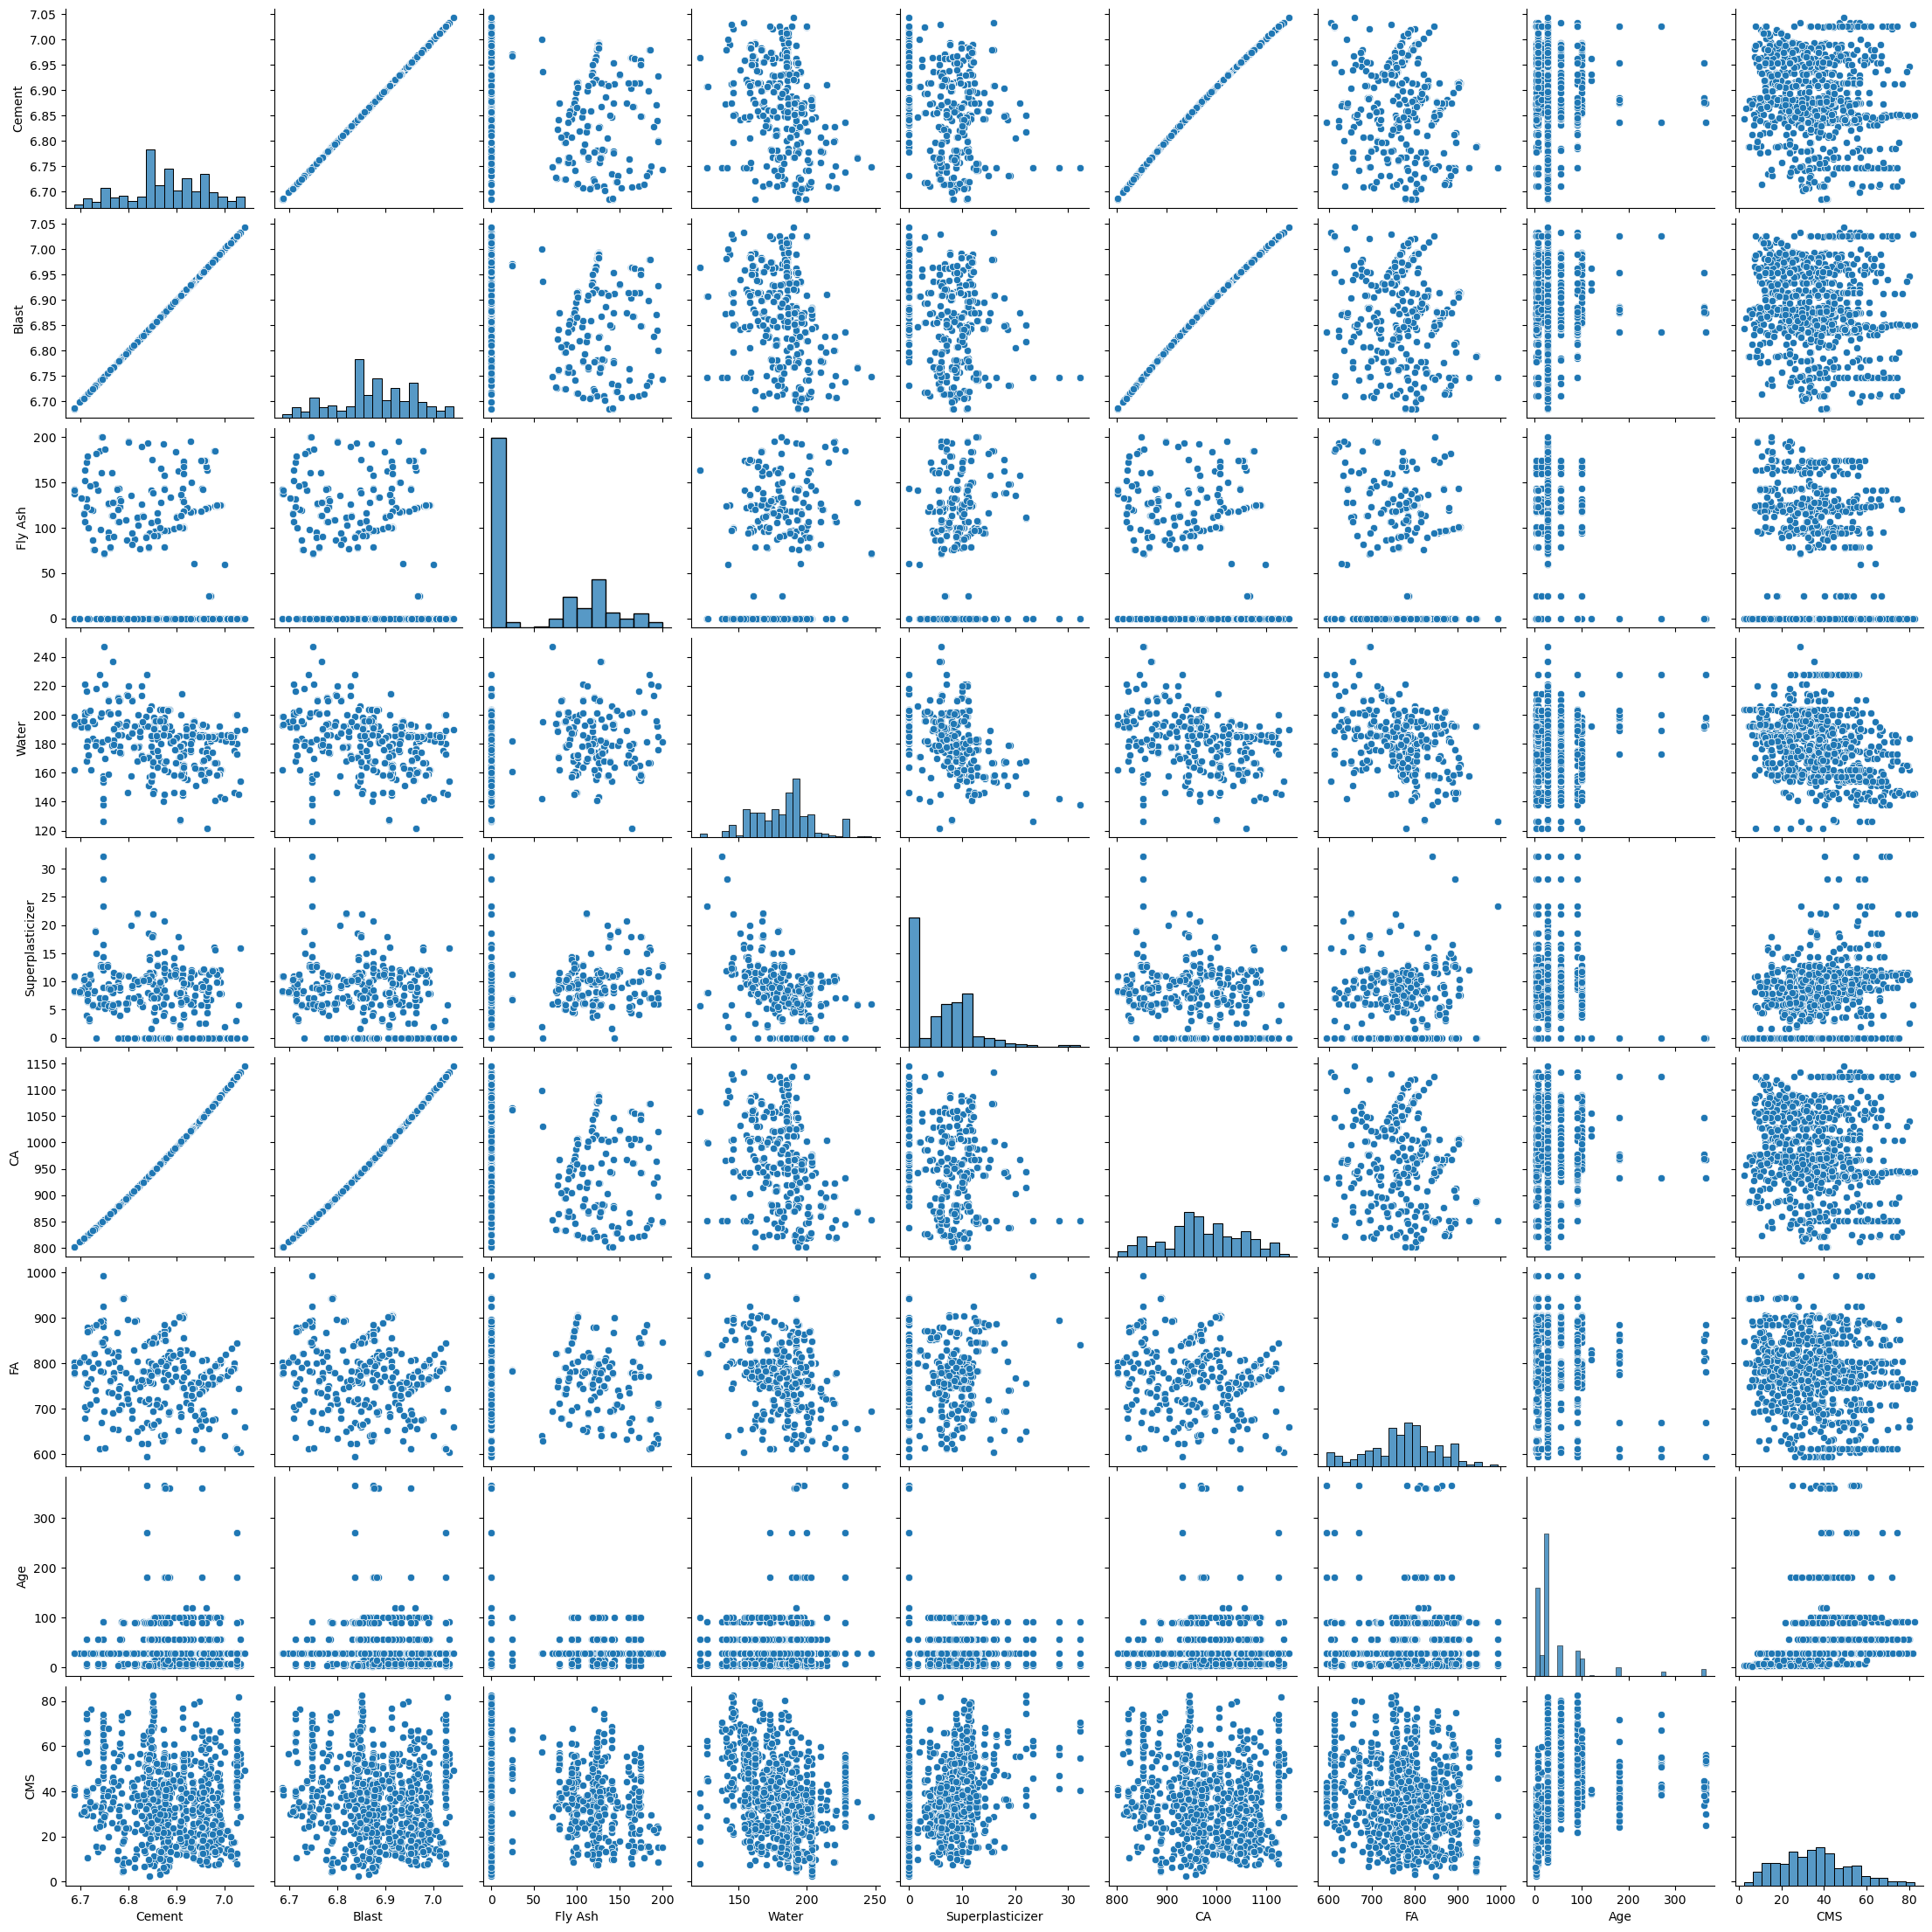

In [55]:
sns.pairplot(cnc)

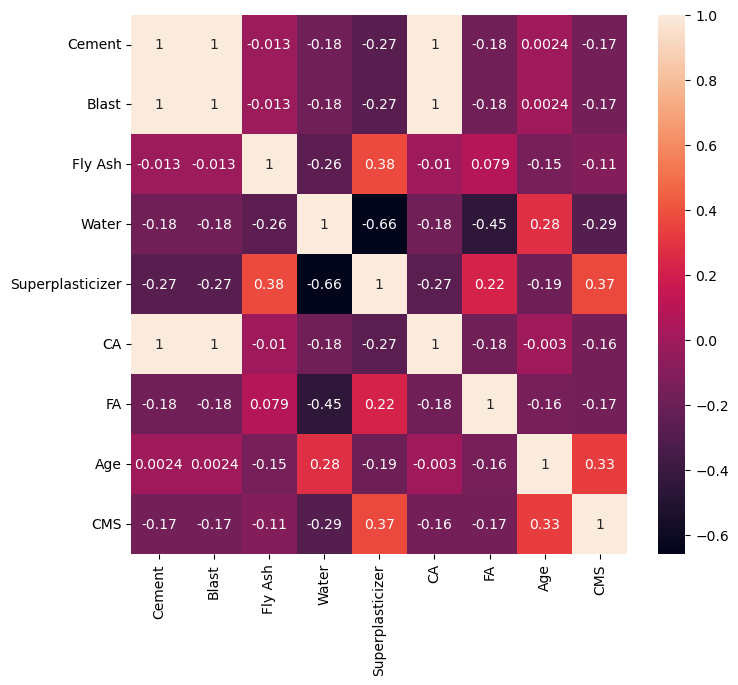

In [56]:
corr_hmap=cnc.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Removing Outliers

In [57]:
cnc_new=cnc[(z<3).all(axis=1)]

In [58]:
cnc.shape

(1030, 9)

In [59]:
cnc_new.shape

(981, 9)

In [60]:
x=cnc.iloc[:,0:-1]

In [61]:
x

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,6.946976,6.946976,0.0,162.0,2.5,1040.0,676.0,28
1,6.961296,6.961296,0.0,162.0,2.5,1055.0,676.0,28
2,6.837333,6.837333,0.0,228.0,0.0,932.0,594.0,270
3,6.837333,6.837333,0.0,228.0,0.0,932.0,594.0,365
4,6.885919,6.885919,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,6.768608,6.768608,90.3,179.6,8.9,870.1,768.3,28
1026,6.706740,6.706740,115.6,196.0,10.4,817.9,813.4,28
1027,6.793914,6.793914,108.6,192.7,6.1,892.4,780.0,28
1028,6.897301,6.897301,0.0,175.6,11.3,989.6,788.9,28


In [62]:
y=cnc.iloc[:,-1]

In [63]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: CMS, Length: 1030, dtype: float64

In [64]:
x.shape

(1030, 8)

In [65]:
y.shape

(1030,)

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [67]:
x_train.shape

(690, 8)

In [68]:
x_test.shape

(340, 8)

In [69]:
y_train.shape

(690,)

In [70]:
y_test.shape

(340,)

In [71]:
lm=LinearRegression()

In [72]:
lm.fit(x_train,y_train)

LinearRegression()

In [74]:
lm.coef_

array([-1.11835872e+02, -1.11835872e+02, -6.43470051e-02, -4.71301809e-01,
        4.29113595e-01,  1.65360478e-01, -8.76063942e-02,  1.14875688e-01])

In [75]:
lm.intercept_

1562.3360865073898

In [76]:
lm.score(x_train,y_train)

0.5347774902987503

In [77]:
#Predict the Value
pred=lm.predict(x_test)
print("Predicted Result Price",pred)
print("Actual Price:",y_test)

Predicted Result Price [62.91043265 48.05793973 63.88784492 47.59843698 20.62128664 41.54115385
 29.81436201 44.97592659 29.32162232 37.52682503 33.37215038 30.98364808
 69.55257986 47.13725176 28.31673253 39.63979697 27.26086603 28.0766533
 32.58292989 30.94440245 35.03942171 28.42735343 33.47842469 27.87590149
 37.97944034 33.31186883 19.88892114 44.90762503 42.93546644 23.68746091
 36.97399191 30.4045324  44.15152773 49.24790235 29.5602465  30.8554119
 28.42869369 41.84461878 24.27483412 35.9085418  23.2903614  20.57372013
 31.46915177 41.97317254 17.11594643 51.88561456 50.70897348 64.44186883
 20.18775883 23.2232455  40.286422   38.53307156 30.02445748 32.62703227
 33.23606378 45.79720312 27.71336269 22.36799369 32.80095571 24.40264401
 41.59007152 29.04471707 28.25888812 53.85872449 25.86034798 30.41585173
 34.23983606 24.33679934 20.43404229 22.58197061 20.00376168 22.41887617
 16.03243478 33.32500237 34.17305018 15.26112119 62.91043265 47.74503871
 41.2590928  19.75042164 39.62

In [78]:
print('error:')
print("Mean_absolute_error:",mean_absolute_error(y_test,pred))
print("Mean_Squared_Error:",mean_squared_error(y_test,pred))
print("Root Mean_Squared_Error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean_absolute_error: 9.435793501622982
Mean_Squared_Error: 133.67785737714607
Root Mean_Squared_Error: 11.561914087950406


In [83]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.5212377850236282


In [84]:
df=pd.DataFrame(pred)
df.to_csv('Concrete_pred_submission.csv')